In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve



In [42]:
df = pd.read_csv("bank.csv")

In [43]:
df.deposit = df.deposit.astype(str)
df.replace({'deposit':{'yes':1, 'no':0}},inplace=True)
y=df['deposit'].values

df_log_reg = df[['age','balance','day','duration','campaign','pdays','previous']]

In [44]:
scaler = StandardScaler()
X=scaler.fit_transform(df_log_reg)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [46]:
cls = LogisticRegression()
cls = cls.fit(X_train, y_train)
y_out = cls.predict(X_test)
y_out_proba = cls.predict_proba(X_test)

In [47]:
accuracy = m.accuracy_score(y_test, y_out)
precision = m.precision_score(y_test, y_out)
recall = m.recall_score(y_test, y_out)
roc_auc = roc_auc_score(y_out, y_test)
f1_score = m.f1_score(y_test, y_out)

In [48]:
print('accuracy', accuracy)
print('precision', precision)
print('recall', recall)
print('roc_auc', roc_auc)
print('F1-score', f1_score)


accuracy 0.7414153478650344
precision 0.7671232876712328
recall 0.6621032980709396
roc_auc 0.74518243894265
F1-score 0.7107548430193721


In [49]:
y_out_proba

array([[0.6776599 , 0.3223401 ],
       [0.03501555, 0.96498445],
       [0.21018178, 0.78981822],
       ...,
       [0.68993645, 0.31006355],
       [0.64511916, 0.35488084],
       [0.02440738, 0.97559262]])

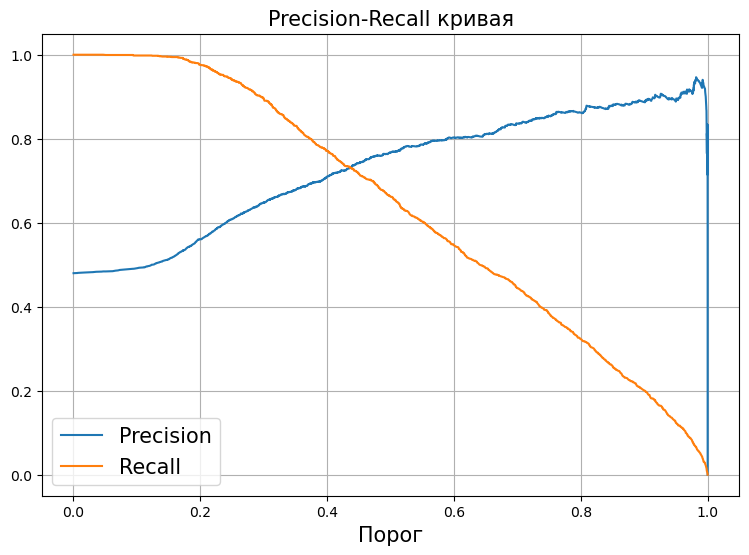

In [50]:
prec, rec, thresh = precision_recall_curve(y_test, y_out_proba[:,1])
plt.figure(figsize=(9,6))
plt.grid()
plt.plot(thresh, prec[:-1], label="Precision")
plt.plot(thresh, rec[:-1], label="Recall")
plt.xlabel(u"Порог", fontsize = 15)
plt.title(u'Precision-Recall кривая', fontsize = 15)
plt.legend(fontsize = 15)

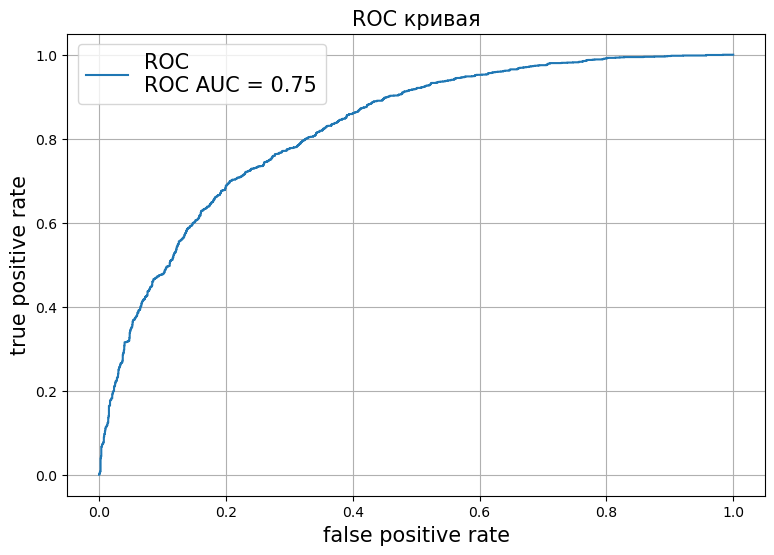

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thr = roc_curve(y_test, y_out_proba[:,1])

plt.figure(figsize = (9,6))
plt.plot(fpr, tpr, label=u'ROC \n'+'ROC AUC = ' + str(round(roc_auc,2)))
plt.grid()
plt.xlabel("false positive rate",fontsize = 15)
plt.ylabel("true positive rate",fontsize = 15)
plt.title(u"ROC кривая", fontsize = 15)
plt.legend(fontsize = 15)

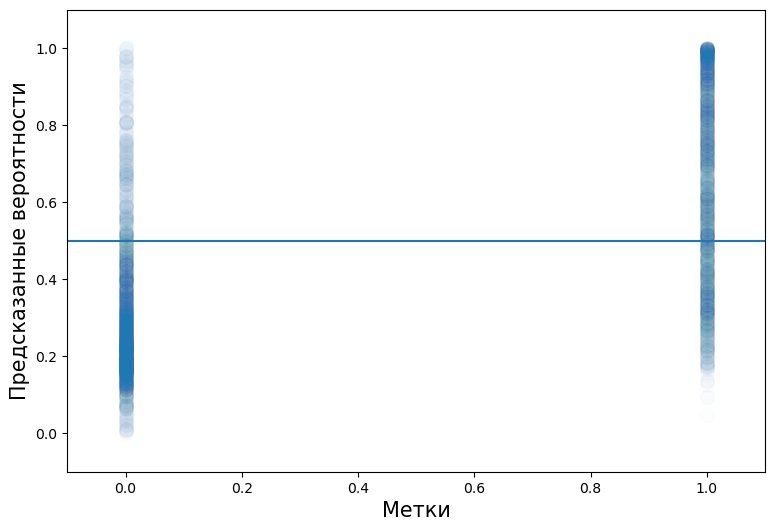

In [52]:
def scatter(actual, predicted, T):
    plt.figure(figsize = (9,6))
    plt.scatter(actual, predicted, s=100, alpha=0.01)
    plt.xlabel(u"Метки", fontsize = 15)
    plt.ylabel(u"Предсказанные вероятности", fontsize = 15)
    plt.plot([-0.2, 1.2], [T,T])
    plt.axis([-0.1, 1.1, -0.1, 1.1])
scatter(y_test, y_out_proba[:,1], 0.5)